<a href="https://colab.research.google.com/github/GurashishJuneja/MMAI-891-NLP-Project/blob/main/Assignment2_Nancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Use the same companies we picked in the Session - 2 Frontier Analysis example, and the same time period (2017-2021). Risk free interest rates can be download yfinance (using the 13 week T-bill yield, symbol is ^IRX). 

a.	One the first business day of January, 2022, use weekly data to estimate the covariance matrix for weekly returns.

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

%matplotlib inline


import importlib.util
import sys

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf

start_date = '2017-01-01'
end_date = '2021-12-31'
stocks = ['^GSPC','AAPL','AMZN','GOOGL','META', 'MCD', 'GM', 'TSLA','PFE']
df = yf.download(stocks, start_date, end_date, interval='1wk')['Adj Close']
df.head(5)


module 'yfinance' is installed
[*********************100%***********************]  9 of 9 completed


,AAPL,AMZN,GM,GOOGL,MCD,META,PFE,TSLA,^GSPC
Date,,,,,,,,,
2017-01-01,27.506430,39.799500,31.265882,41.260502,103.992508,123.410004,24.976410,15.267333,2276.979980
2017-01-08,27.770035,40.856998,32.438675,41.547001,104.629753,128.339996,24.260246,15.850000,2274.639893
2017-01-15,27.993988,40.416500,32.151989,41.408501,105.284225,127.040001,23.700737,16.315332,2271.310059
2017-01-22,28.448885,41.788502,32.151989,42.251499,105.800919,132.179993,23.439634,16.863333,2294.689941
2017-01-29,30.112204,40.509998,31.561251,41.006500,106.989288,130.979996,23.939465,16.755333,2297.419922


# **Download the risk free interest rate **

Risk free interest rates can be download yfinance (using the 13 week T-bill yield, symbol is ^IRX).

In [10]:
# Define the ticker symbol
tickerSymbol = '^IRX'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2022-10-3', end='2022-12-30')
# See your data
print(tickerDf)

                            Open   High    Low  Close  Volume  Dividends  \
Date                                                                       
2022-10-03 00:00:00-04:00  3.165  3.190  3.140  3.150       0        0.0   
2022-10-04 00:00:00-04:00  3.305  3.320  3.260  3.315       0        0.0   
2022-10-05 00:00:00-04:00  3.290  3.315  3.290  3.293       0        0.0   
2022-10-06 00:00:00-04:00  3.285  3.298  3.263  3.288       0        0.0   
2022-10-07 00:00:00-04:00  3.273  3.295  3.233  3.293       0        0.0   
...                          ...    ...    ...    ...     ...        ...   
2022-12-22 00:00:00-05:00  4.195  4.213  4.178  4.208       0        0.0   
2022-12-23 00:00:00-05:00  4.195  4.208  4.183  4.193       0        0.0   
2022-12-27 00:00:00-05:00  4.198  4.223  4.153  4.195       0        0.0   
2022-12-28 00:00:00-05:00  4.338  4.343  4.328  4.338       0        0.0   
2022-12-29 00:00:00-05:00  4.333  4.333  4.295  4.295       0        0.0   

           

# Download the weekly data starting from the first business day of January 2022

[*********************100%***********************]  9 of 9 completed
           AAPL      AMZN        GM     GOOGL       MCD      META       PFE  \
AAPL   0.001495  0.000703  0.000759  0.000711  0.000465  0.000823  0.000353   
AMZN   0.000703  0.001396  0.000353  0.000707  0.000294  0.000828  0.000209   
GM     0.000759  0.000353  0.003142  0.000846  0.000906  0.000988  0.000375   
GOOGL  0.000711  0.000707  0.000846  0.001138  0.000452  0.000867  0.000328   
MCD    0.000465  0.000294  0.000906  0.000452  0.000819  0.000476  0.000270   
META   0.000823  0.000828  0.000988  0.000867  0.000476  0.001779  0.000399   
PFE    0.000353  0.000209  0.000375  0.000328  0.000270  0.000399  0.001043   
TSLA   0.001330  0.001144  0.001700  0.001010  0.000815  0.001062  0.000438   
^GSPC  0.000652  0.000494  0.000936  0.000607  0.000497  0.000655  0.000410   

           TSLA     ^GSPC  
AAPL   0.001330  0.000652  
AMZN   0.001144  0.000494  
GM     0.001700  0.000936  
GOOGL  0.001010  0.000607  


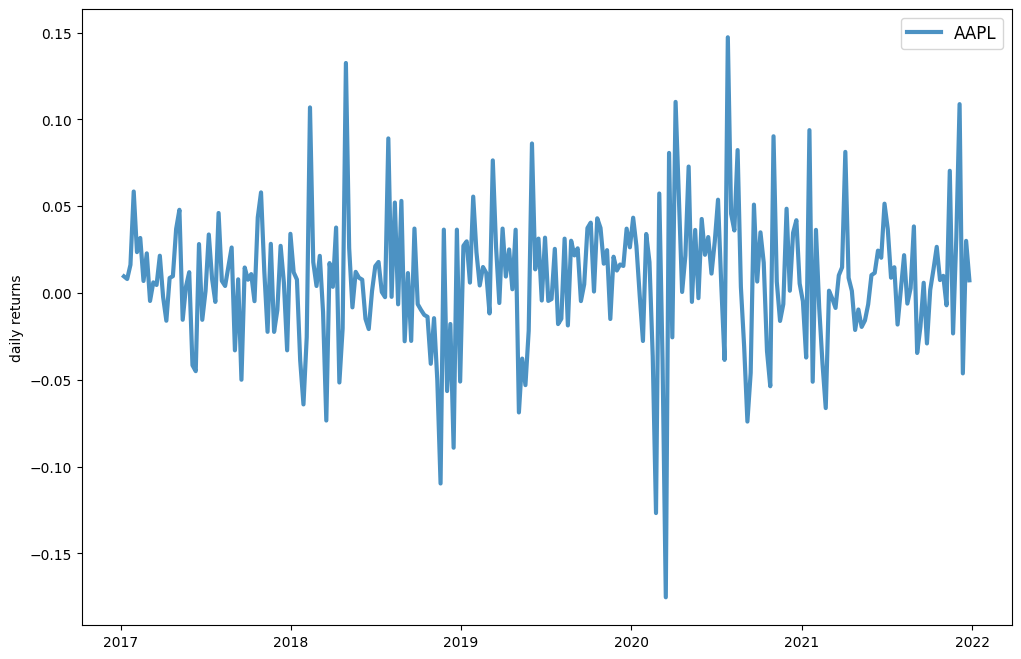

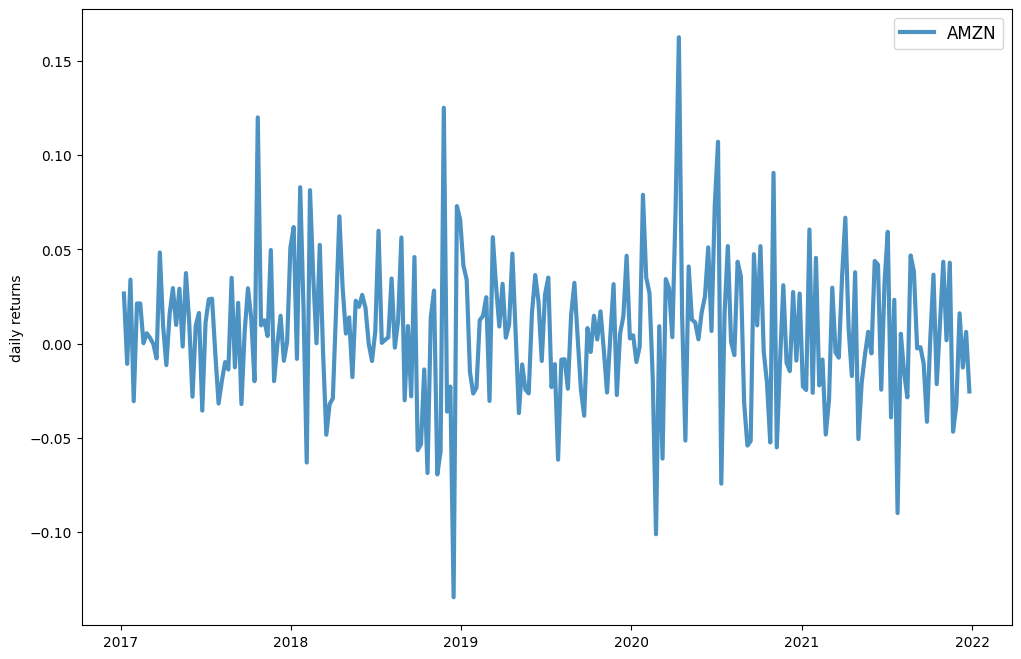

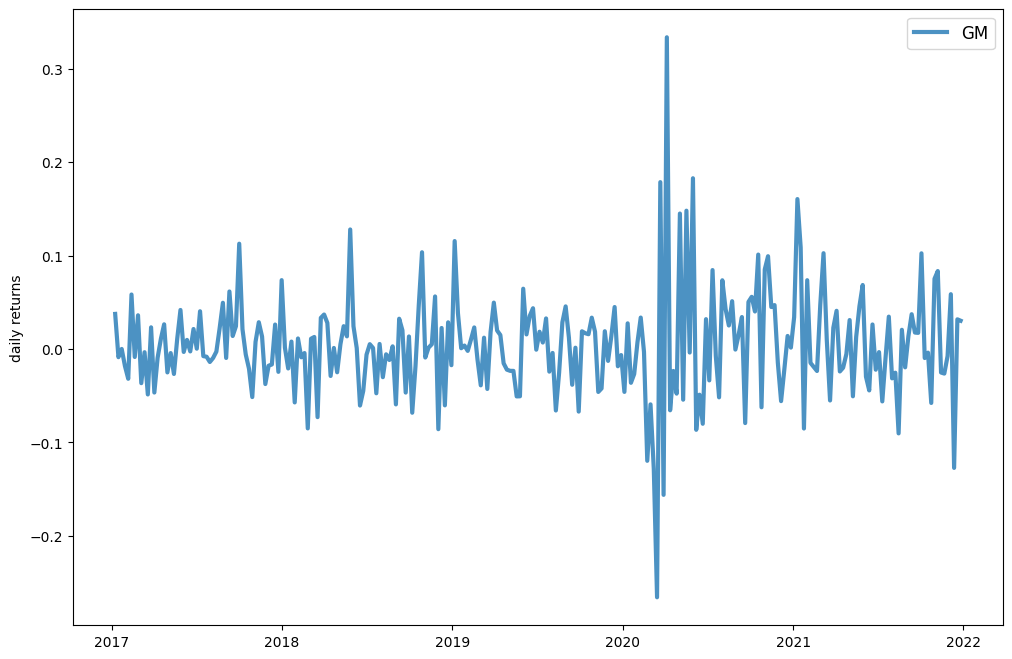

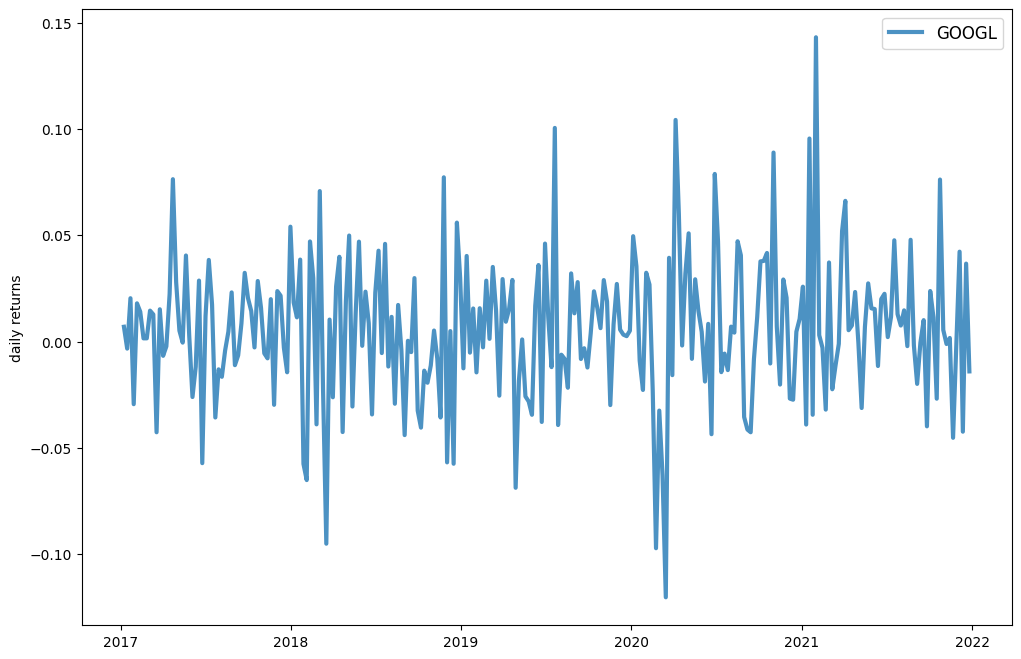

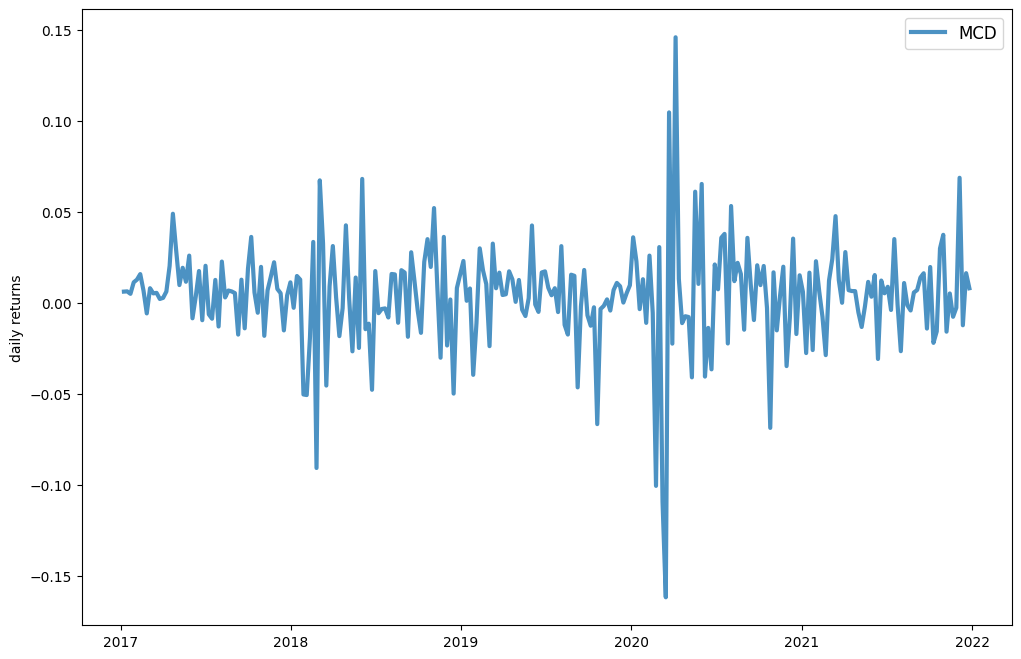

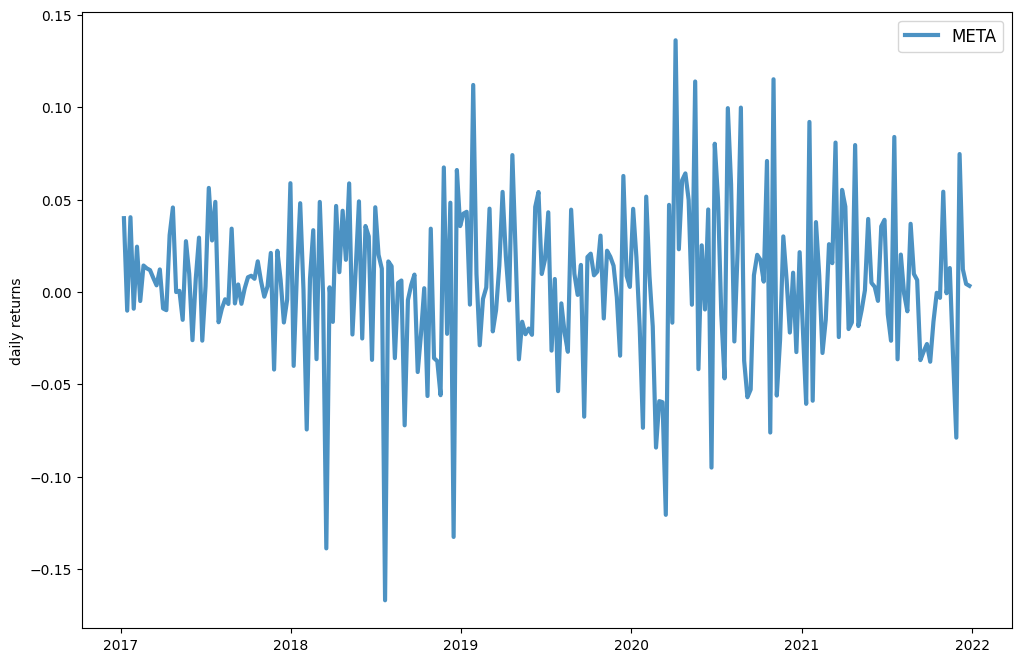

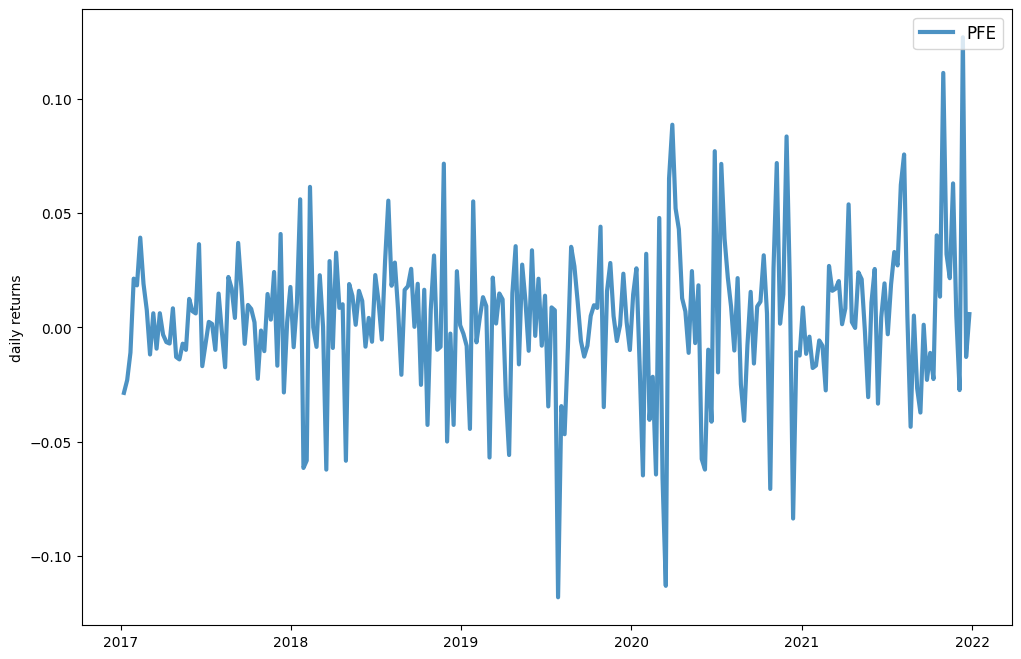

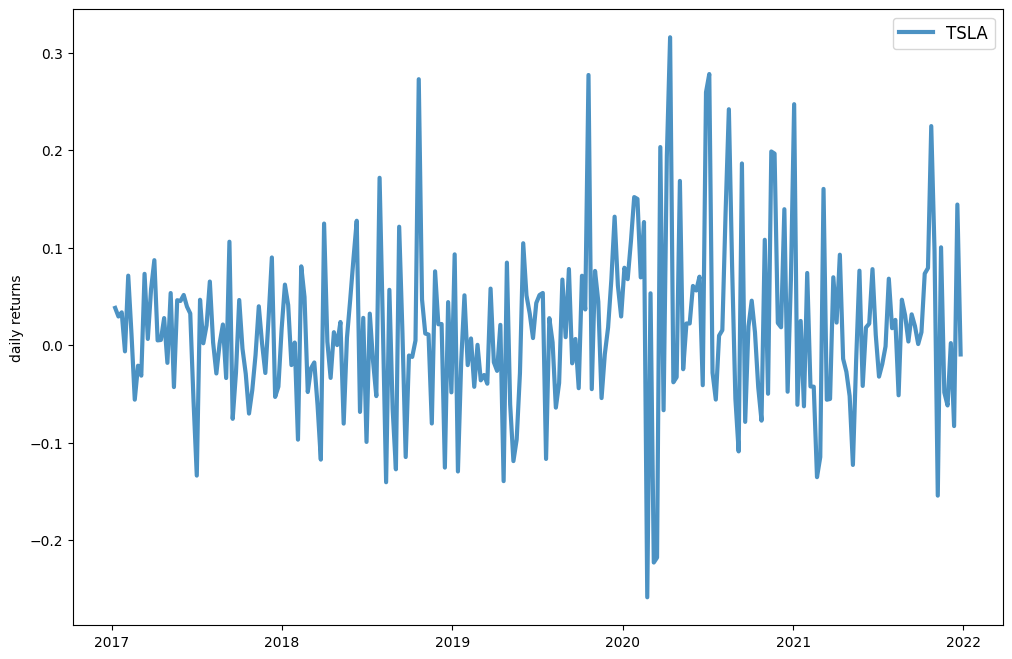

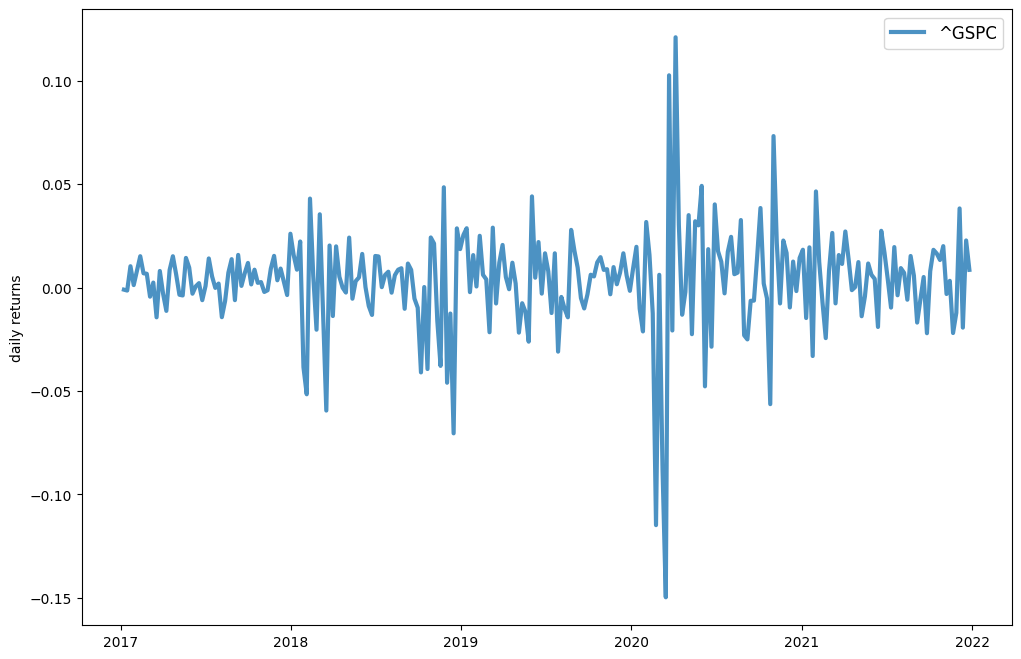

In [12]:
# Download the weekly data starting from the first business day of January 2022
data = yf.download(stocks, start='2022-01-03', end='2022-12-30', interval='1wk')

# Keep only the "Adj Close" prices
prices = data['Adj Close']

# Calculate the weekly returns
returns = df.pct_change().dropna()

# Calculate the covariance matrix
cov_matrix = returns.cov()

print(cov_matrix)

for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')
    plt.show()


<Axes: xlabel='Date'>

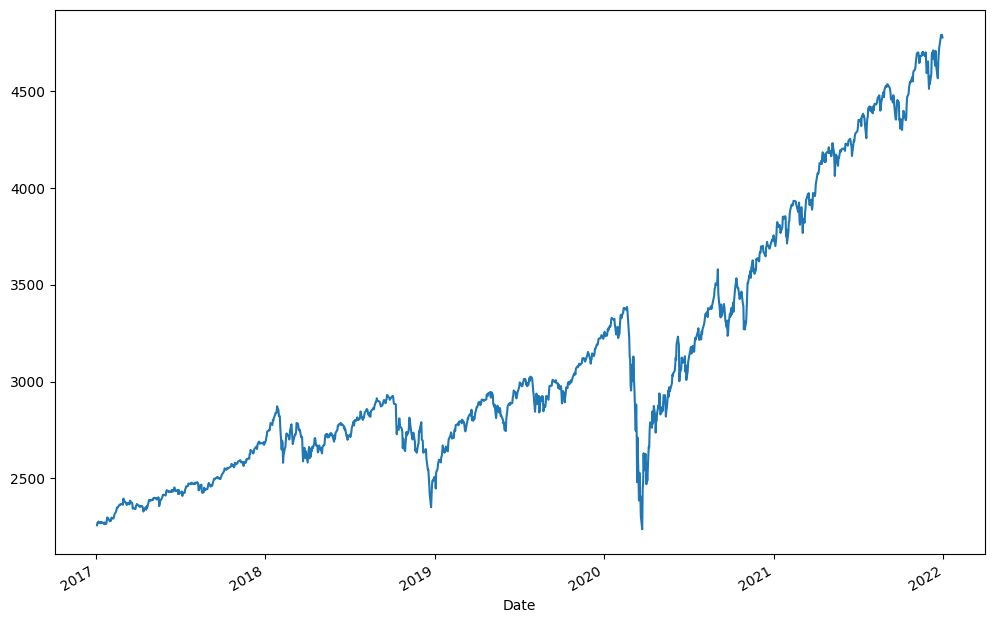

In [2]:
df['^GSPC'].plot(figsize=(12,8))


## **b.	Use any ML tools to forecast the returns for each stocks for the first week of January of 2022. You can use the LSTM (or others) for the forecast. **

Use the regression model to predict the return


In [20]:
# Use Apple stock as an example
# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
data = tickerData.history(period='1d', start='2017-1-1', end='2021-12-31')

# Prepare data for LSTM
close_prices = data['Close'].values.reshape(-1, 1)

# Scale the data with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# Scale the data with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# Create a function to process the data into look back slices
def processData(data, look_back):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        X.append(data[i:(i+look_back), 0])
        Y.append(data[(i+look_back), 0])
    return np.array(X), np.array(Y)

look_back = 5 # choose look_back parameter
X, Y = processData(scaled_data, look_back)
X_train, X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
Y_train, Y_test = Y[:int(Y.shape[0]*0.80)],Y[int(Y.shape[0]*0.80):]

# Reshape the data to fit the LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(look_back, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
16/16 [==============================] - 3s 4ms/step - loss: 0.0689
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0538
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0425
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0343
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0282
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0200
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 11/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 13/50
16/16 [==============================

In [21]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


8/8 [==============================] - 0s 2ms/step


In [22]:
# Get the actual values
trainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([Y_train])

testPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([Y_test])

In [26]:

# Get the first week of January 2022 data
start_date = '2022-01-01'
end_date = '2022-01-31'

week_data = tickerData.history(period='1d', start=start_date, end=end_date)
week_prices = week_data['Close'].values.reshape(-1, 1)
week_scaled = scaler.transform(week_prices)

# Prepare the week data
X_week, _ = processData(week_scaled, look_back)

# Reshape the week data
X_week = X_week.reshape((X_week.shape[0], X_week.shape[1], 1))

# Make predictions for the week
weekPredict = model.predict(X_week)
weekPredict = scaler.inverse_transform(weekPredict)

# Calculate returns
week_returns = pd.DataFrame(weekPredict, columns=['Predicted Close']).pct_change()

print("Predicted returns for the first week of January 2022:")
print(week_returns)

1/1 [==============================] - 0s 21ms/step
Predicted returns for the first week of January 2022:
    Predicted Close
0               NaN
1         -0.006298
2         -0.005030
3         -0.001026
4          0.000990
5          0.001088
6          0.000451
7         -0.003723
8         -0.005982
9         -0.004913
10        -0.007780
11        -0.006877
12        -0.004747
